<a href="https://colab.research.google.com/github/jaekang0/ADS-Catheter-Placement-Group/blob/Byron-branch/Catheter_MAIN_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CATHETER PLACEMENT

In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive
%cd MyDrive
%cd ranzcr-clip-catheter-line-classification

/content/drive
/content/drive/MyDrive
/content/drive/.shortcut-targets-by-id/1iIEMbOz_lmWVFpEh7CAqZGQsZBHLZ8zt/ranzcr-clip-catheter-line-classification


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

train_data = pd.read_csv('/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train.csv')
train_data

StudyInstanceUID  ETT - Abnormal  \
0      1.2.826.0.1.3680043.8.498.26697628953273228189...               0   
1      1.2.826.0.1.3680043.8.498.46302891597398758759...               0   
2      1.2.826.0.1.3680043.8.498.23819260719748494858...               0   
3      1.2.826.0.1.3680043.8.498.68286643202323212801...               0   
4      1.2.826.0.1.3680043.8.498.10050203009225938259...               0   
...                                                  ...             ...   
30078  1.2.826.0.1.3680043.8.498.74257566841157531124...               0   
30079  1.2.826.0.1.3680043.8.498.46510939987173529969...               0   
30080  1.2.826.0.1.3680043.8.498.43173270582850645437...               0   
30081  1.2.826.0.1.3680043.8.498.95092491950130838685...               0   
30082  1.2.826.0.1.3680043.8.498.99518162226171269731...               0   

       ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                     0             0               0                 0   
1                     0             1               0                 0   
2                     0             0               0                 0   
3                     0             0               0                 0   
4                     0             0               0                 0   
...                 ...           ...             ...               ...   
30078                 0             1               0                 0   
30079                 0             0               0                 0   
30080                 0             1               0                 0   
30081                 0             0               0                 0   
30082                 0             1               0                 0   

       NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  \
0                              0             1               0   
1                              1             0               0   
2                              0             0               0   
3                              0             0               1   
4                              0             0               0   
...                          ...           ...             ...   
30078                          0             0               0   
30079                          0             0               0   
30080                          1             0               1   
30081                          0             0               0   
30082                          0             0               0   

       CVC - Borderline  CVC - Normal  Swan Ganz Catheter Present  PatientID  
0                     0             0                           0  ec89415d1  
1                     0             1                           0  bf4c6da3c  
2                     1             0                           0  3fc1c97e5  
3                     0             0                           0  c31019814  
4                     0             1                           0  207685cd1  
...                 ...           ...                         ...        ...  
30078                 1             1                           0  5b5b9ac30  
30079                 0             1                           0  7192404d8  
30080                 0             1                           0  d4d1b066d  
30081                 1             0                           0  01a6602b8  
30082                 0             1                           0  e692d316c  

[30083 rows x 13 columns]

In [ ]:
train_anno = pd.read_csv('/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train_annotations.csv')
train_anno.head()

StudyInstanceUID             label  \
0  1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
1  1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
2  1.2.826.0.1.3680043.8.498.72921907356394389969...  CVC - Borderline   
3  1.2.826.0.1.3680043.8.498.11697104485452001927...      CVC - Normal   
4  1.2.826.0.1.3680043.8.498.87704688663091069148...      NGT - Normal   

                                                data  
0  [[1487, 1279], [1477, 1168], [1472, 1052], [14...  
1  [[1328, 7], [1347, 101], [1383, 193], [1400, 2...  
2  [[801, 1207], [812, 1112], [823, 1023], [842, ...  
3  [[1366, 961], [1411, 861], [1453, 751], [1508,...  
4  [[1862, 14], [1845, 293], [1801, 869], [1716, ...

In [ ]:
train_data.shape

(30083, 13)

In [ ]:
train_anno.shape

(17999, 3)

There are less annotations than actual data



In [ ]:
number_of_patients = train_data['PatientID'].value_counts()
number_of_studies = train_data['StudyInstanceUID'].value_counts()
number_of_studies_anno = train_anno['StudyInstanceUID'].value_counts()

print(f"Number of patients in train_data: {len(number_of_patients)}")
print(f"Number of studies in train_data: {len(number_of_studies)}")
print(f"Number of studies in train_anno: {len(number_of_studies_anno)}")

Number of patients in train_data: 3255
Number of studies in train_data: 30083
Number of studies in train_anno: 9095


Not all studies are annotated

In [ ]:
#All study instances are not annotated, will create separate df of only annotated images.
study_annotated = pd.merge(train_data, train_anno, on='StudyInstanceUID', how='inner')

In [ ]:
study_annotated.head()

StudyInstanceUID  ETT - Abnormal  \
0  1.2.826.0.1.3680043.8.498.23819260719748494858...               0   
1  1.2.826.0.1.3680043.8.498.23133310896792275593...               0   
2  1.2.826.0.1.3680043.8.498.23133310896792275593...               0   
3  1.2.826.0.1.3680043.8.498.21553435248897151659...               0   
4  1.2.826.0.1.3680043.8.498.21553435248897151659...               0   

   ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                 0             0               0                 0   
1                 0             0               0                 0   
2                 0             0               0                 0   
3                 0             1               1                 0   
4                 0             1               1                 0   

   NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  CVC - Borderline  \
0                          0             0               0                 1   
1                          0             0               0                 1   
2                          0             0               0                 1   
3                          0             1               0                 0   
4                          0             1               0                 0   

   CVC - Normal  Swan Ganz Catheter Present  PatientID             label  \
0             0                           0  3fc1c97e5  CVC - Borderline   
1             1                           0  f6147af3f      CVC - Normal   
2             1                           0  f6147af3f  CVC - Borderline   
3             1                           0  00f261590      ETT - Normal   
4             1                           0  00f261590      NGT - Normal   

                                                data  
0  [[950, 1272], [980, 1174], [1011, 1070], [1058...  
1  [[914, 758], [957, 615], [1047, 543], [1145, 4...  
2  [[930, 991], [918, 860], [909, 779], [900, 658...  
3  [[1026, 661], [1082, 519], [1128, 396], [1162,...  
4  [[1738, 1470], [1564, 1659], [1492, 1733], [14...

In [ ]:
study_annotated.shape

(17999, 15)

# Data Cleaning

Checking for null values:

In [ ]:
train_data.isna().sum()

StudyInstanceUID              0
ETT - Abnormal                0
ETT - Borderline              0
ETT - Normal                  0
NGT - Abnormal                0
NGT - Borderline              0
NGT - Incompletely Imaged     0
NGT - Normal                  0
CVC - Abnormal                0
CVC - Borderline              0
CVC - Normal                  0
Swan Ganz Catheter Present    0
PatientID                     0
dtype: int64

Checking for duplicates

In [ ]:
duplicates = train_data.duplicated()
num_duplicates = duplicates.sum()
print(f"Duplicates present: {num_duplicates}")

Duplicates present: 0


# Exploratory Data Analysis

In [ ]:
train_data.shape

(30083, 13)

Meaning of each variables:

StudyInstanceUID : unique ID for each image

ETT - Abnormal : endotracheal tube placement abnormal

ETT - Borderline : endotracheal tube placement borderline abnormal

ETT - Normal : endotracheal tube placement normal

NGT - Abnormal : nasogastric tube placement abnormal

NGT - Borderline : nasogastric tube placement borderline abnormal

NGT - Incompletely Imaged : nasogastric tube placement inconclusive due to imaging

NGT - Normal : nasogastric tube placement borderline normal

CVC - Abnormal : central venous catheter placement abnormal

CVC - Borderline : central venous catheter placement borderline abnormal

CVC - Normal : central venous catheter placement normal

Swan Ganz Catheter Present

PatientID : unique ID for each patient in the dataset

### Distribution of Catheter Types

In [ ]:
sums_of_catheters = train_data[['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']].sum()
sums_of_catheters

ETT - Abnormal                   79
ETT - Borderline               1138
ETT - Normal                   7240
NGT - Abnormal                  279
NGT - Borderline                529
NGT - Incompletely Imaged      2748
NGT - Normal                   4797
CVC - Abnormal                 3195
CVC - Borderline               8460
CVC - Normal                  21324
Swan Ganz Catheter Present      830
dtype: int64

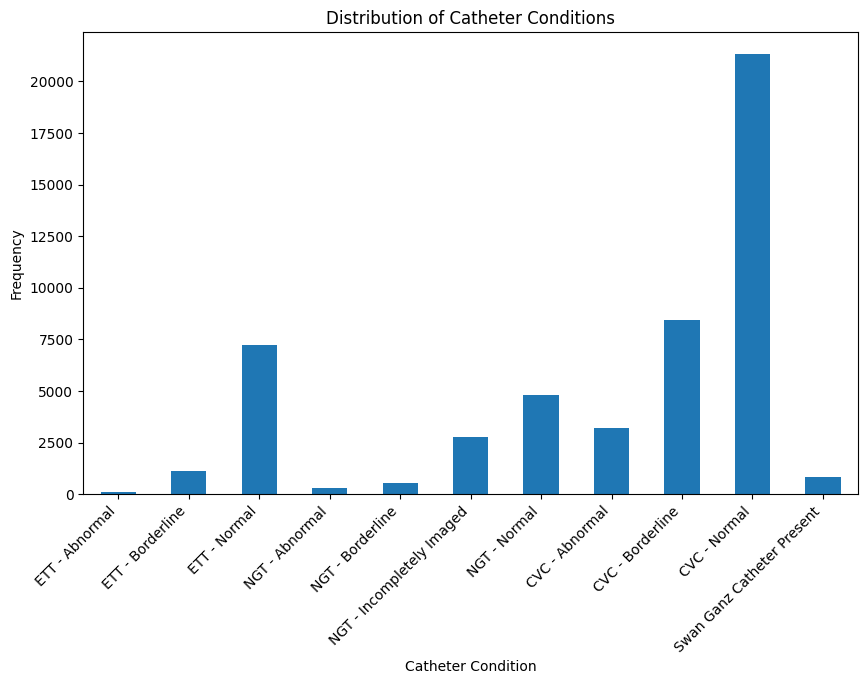

In [ ]:
catheter_columns = ['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
                   'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
                   'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline',
                   'CVC - Normal', 'Swan Ganz Catheter Present']

sums_of_catheters = train_data[catheter_columns].sum()
sums_of_catheters.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Catheter Conditions')
plt.xlabel('Catheter Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
print("Number of unique patients: ", train_data["PatientID"].unique().shape[0])

Number of unique patients:  3255


In [ ]:
print(f"The train dataset has {train_data.shape[0]} observations and it contains {train_data['PatientID'].nunique()} patient ids")

The train dataset has 30083 observations and it contains 3255 patient ids


## Correlation Analysis

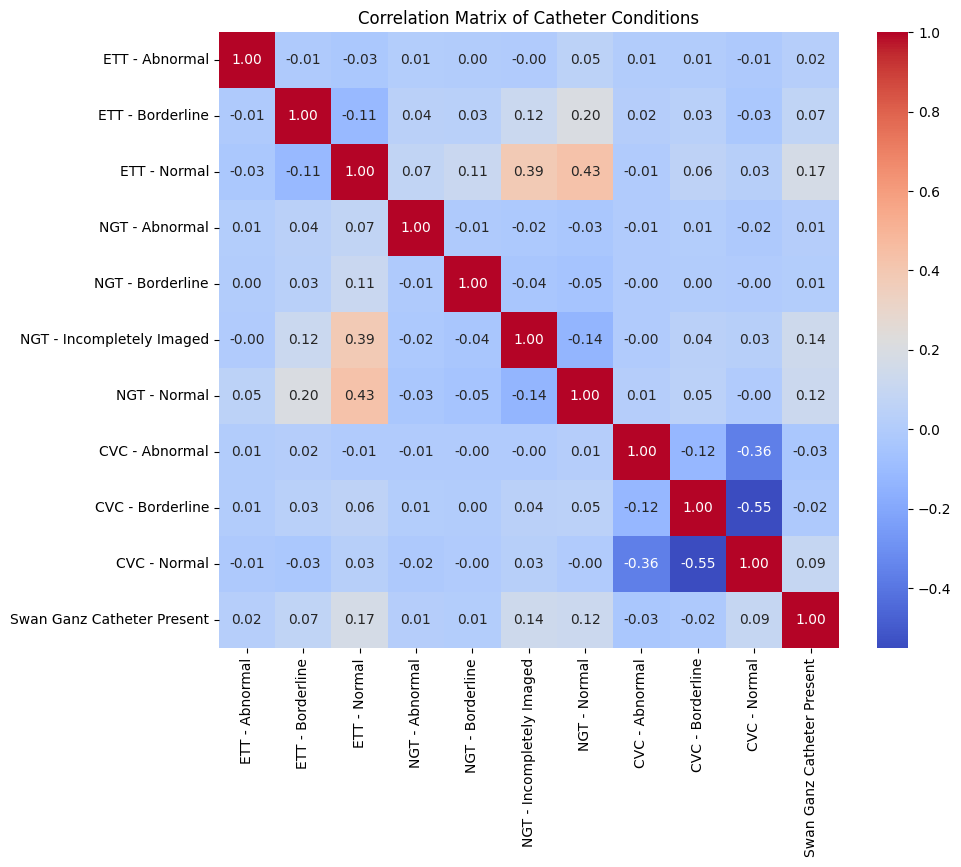

In [ ]:
corr_matrix = train_data[catheter_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Catheter Conditions')
plt.show()


## PatientID Analysis

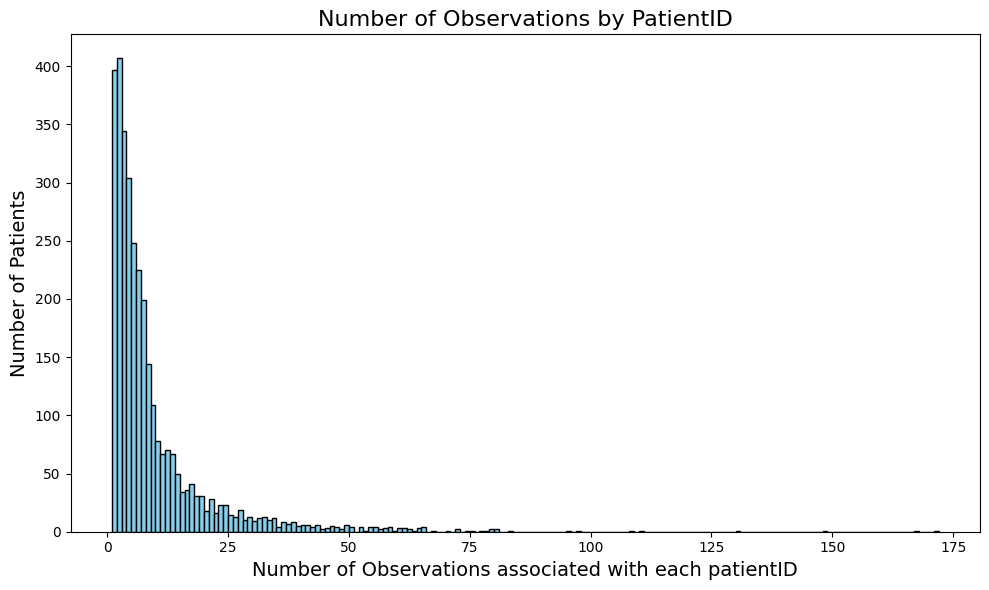

In [ ]:
# Count the number of observations per PatientID
observations_per_patient = train_data['PatientID'].value_counts()

# Plot the distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(observations_per_patient, bins=range(1, observations_per_patient.max() + 1), color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Number of Observations by PatientID', fontsize=16)
plt.xlabel('Number of Observations associated with each patientID', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Image Analysis

In [ ]:
pip install opencv-python


For this segment, I will graph the location of the catheters from 5 random patients

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Directory where your X-ray images are stored
image_dir = "/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train/"

# Define a color map for different catheter types
color_map = {
    'ETT - Abnormal': 'red',
    'ETT - Borderline': 'orange',
    'ETT - Normal': 'green',
    'NGT - Abnormal': 'blue',
    'NGT - Borderline': 'purple',
    'NGT - Incompletely Imaged': 'brown',
    'NGT - Normal': 'pink',
    'CVC - Abnormal': 'yellow',
    'CVC - Borderline': 'cyan',
    'CVC - Normal': 'magenta',
    'Swan Ganz Catheter Present': 'black'
}

# Improved function to plot catheters on the image
def plot_catheter_on_image(study_instance_uid, annotations_df):
    # Load the image corresponding to the StudyInstanceUID using OpenCV
    image_path = f"{image_dir}{study_instance_uid}.jpg"
    xray_image = cv2.imread(image_path)

    if xray_image is None:
        print(f"Image {study_instance_uid} not found.")
        return

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

    # Filter the annotations for this particular image
    annotations = annotations_df[annotations_df['StudyInstanceUID'] == study_instance_uid]

    # Display the image
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(xray_image_rgb)

    # Plot each coordinate point with its label
    for _, row in annotations.iterrows():
        coords = eval(row['data'])  # Convert string to list of coordinates
        label = row['label']

        # Get the color for this catheter type
        color = color_map.get(label, 'red')  # Default to red if label not in map

        # Plot each point in the coordinate list
        for coord in coords:
            ax.scatter(coord[0], coord[1], color=color, s=50, label=label)

    # Ensure only one legend entry per catheter type
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

    ax.set_title(f"Catheter Placements for StudyInstanceUID: {study_instance_uid}")
    plt.axis('off')
    plt.show()


In [ ]:
study_annotated['StudyInstanceUID'] == '1.2.826.0.1.3680043.8.498.12901508112365964189424406388273352286'

0        False
1        False
2        False
3        False
4        False
         ...  
17994    False
17995    False
17996    False
17997    False
17998    False
Name: StudyInstanceUID, Length: 17999, dtype: bool

There are less actual images than annotated images, so will filter and use a new df

In [ ]:
import os
import pandas as pd

# Directory where your X-ray images are stored
image_dir = "/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train/"

# List all files in the image directory
available_images = set(os.listdir(image_dir))

# Assuming the images are named like StudyInstanceUID.jpg
# You may need to adjust this if they have a different extension
available_uids = {os.path.splitext(image)[0] for image in available_images}

# Filter study_annotated to include only rows where StudyInstanceUID exists in available_uids
study_annotated_filtered = study_annotated[study_annotated['StudyInstanceUID'].isin(available_uids)]

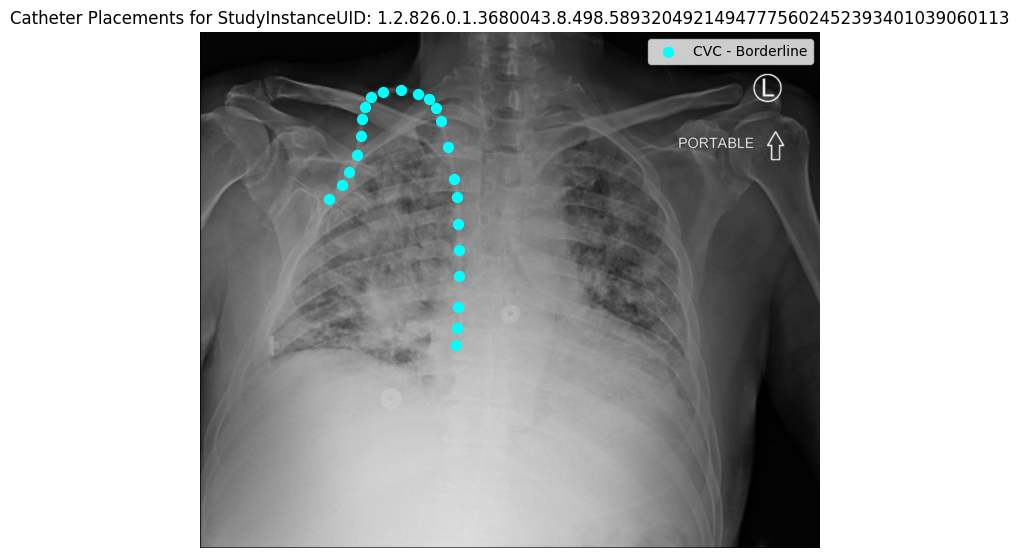

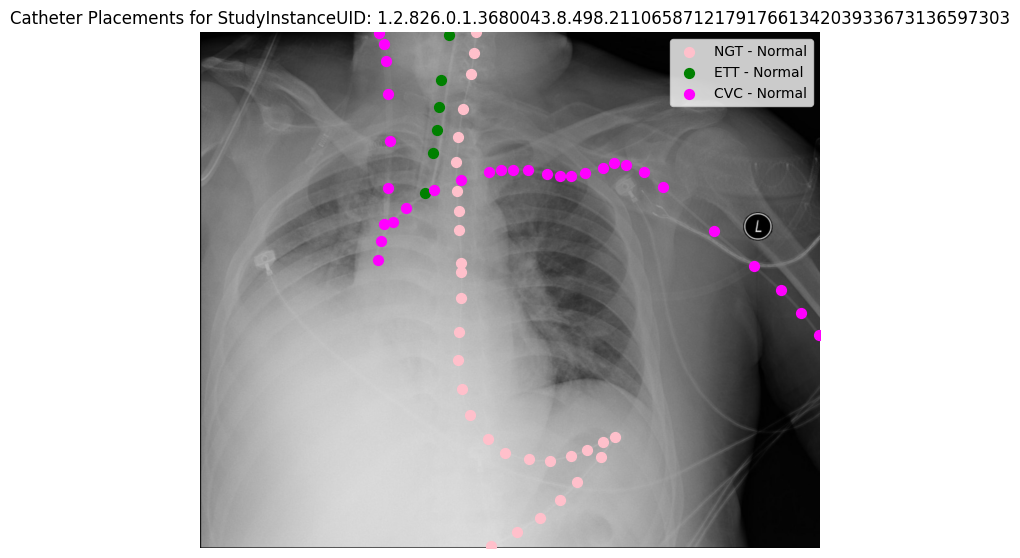

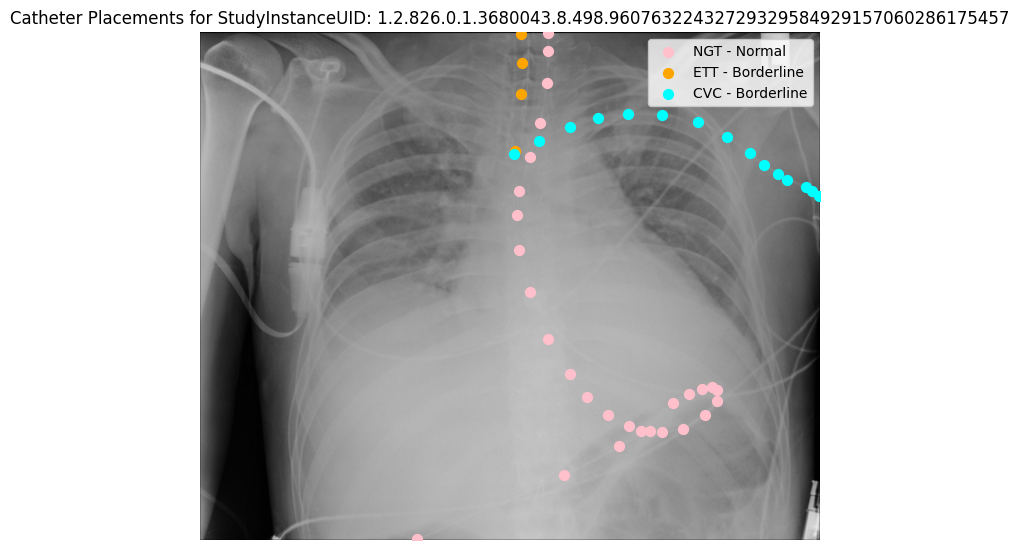

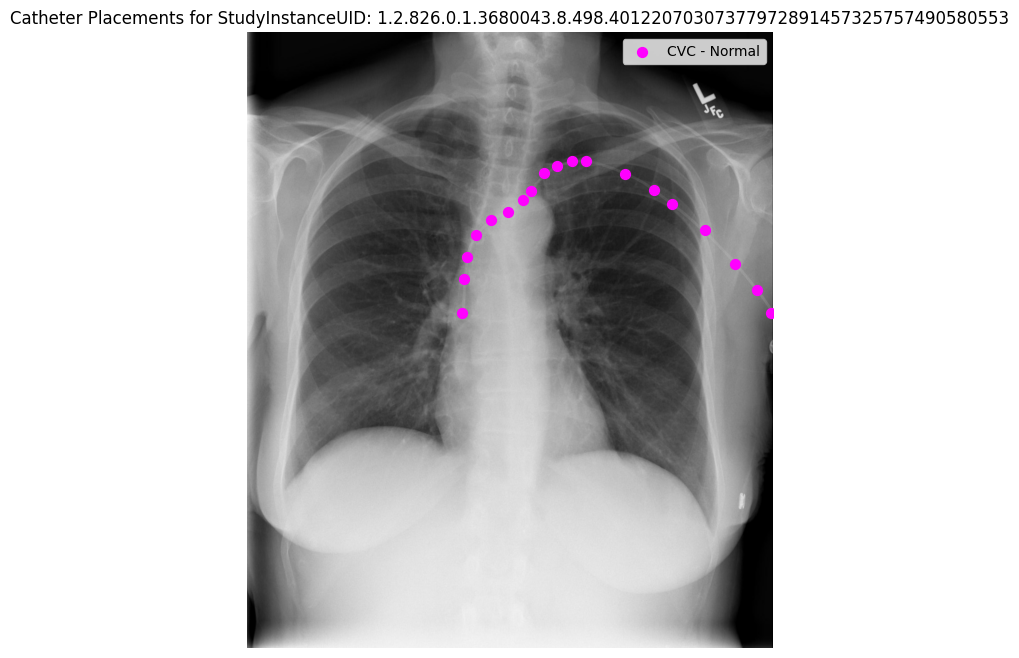

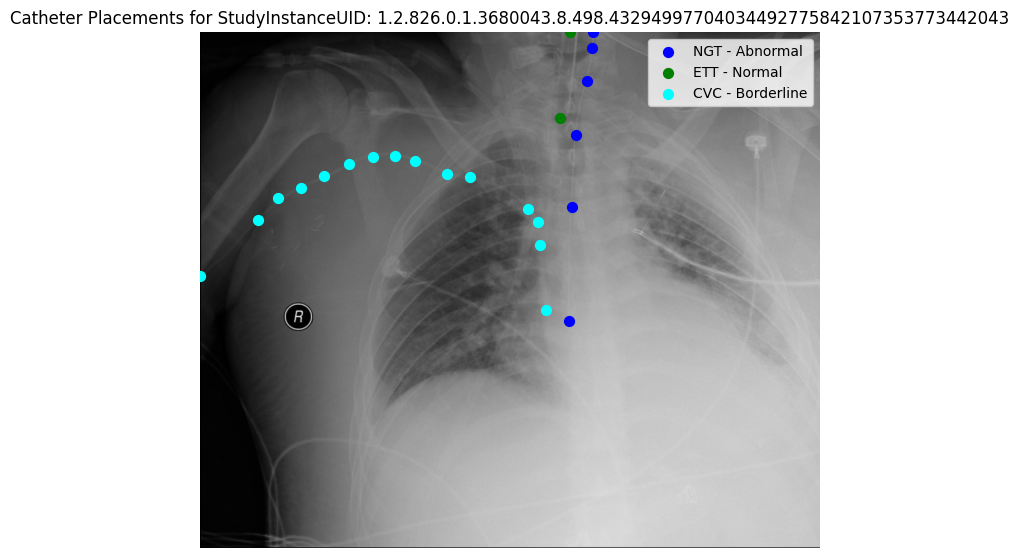

In [ ]:
# Select 5 random StudyInstanceUIDs from the filtered DataFrame
random_studies = study_annotated_filtered['StudyInstanceUID'].sample(n=5, random_state=42)

# Plot the randomly selected 3 studies
for study_uid in random_studies:
    plot_catheter_on_image(study_uid, study_annotated_filtered)

##Byron Segment

CVC-Normal Example

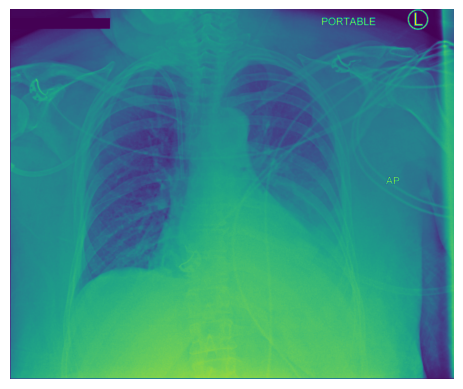

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img_path = '/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.99991581639229040366812735770671130168.jpg'
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis

plt.show()


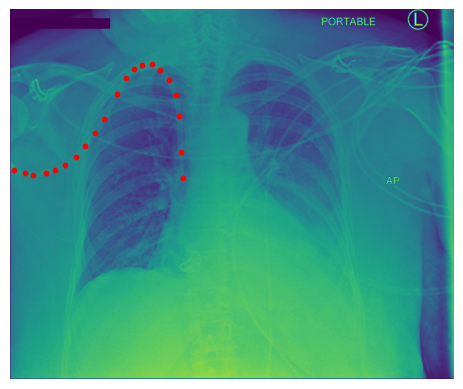

In [ ]:
# Load the image
img_path = '/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.99991581639229040366812735770671130168.jpg'
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis


coordinates = [[1193, 1158], [1176, 982], [1166, 734], [1139, 587], [1092, 487],
                [1031, 417], [974, 378], [910, 380], [851, 407], [800, 470],
                [738, 583], [645, 755], [588, 851], [519, 937], [456, 1013],
                [379, 1068], [311, 1107], [247, 1123], [161, 1137], [104, 1127],
                [25, 1105]]
for (x, y) in coordinates:
    plt.scatter(x, y, c='red', s=10)


CVC-Borderline, 1.2.826.0.1.3680043.8.498.11425757242052562230583528219663647190, made a copy, called CVC-abnormal



In [ ]:
# Load the image
img_path = '/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/CVC-abnormal.jpg'
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/.shortcut-targets-by-id/1iIEMbOz_lmWVFpEh7CAqZGQsZBHLZ8zt/ranzcr-clip-catheter-line-classification/train/CVC-abnormal.jpg'

In [ ]:
# Load the image
img_path = '/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/CVC-abnormal.jpg'
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis

coordinates = [[1446, 1336], [1283, 1311], [1185, 1286], [1116, 1246],
                [1037, 1199], [934, 1165], [869, 1147], [781, 1131], [686, 1139],
                 [613, 1152], [565, 1169], [532, 1200], [493, 1247], [461, 1284],
                 [417, 1315], [385, 1330], [353, 1351], [323, 1380], [289, 1459]]
for (x, y) in coordinates:
    plt.scatter(x, y, c='red', s=10)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/.shortcut-targets-by-id/1iIEMbOz_lmWVFpEh7CAqZGQsZBHLZ8zt/ranzcr-clip-catheter-line-classification/CVC-abnormal.jpg'

CVC-Borderline, copy of 1.2.826.0.1.3680043.8.498.10585091086014820921178168135991548743

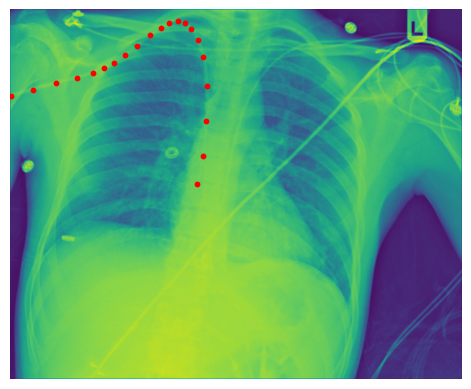

In [ ]:
# Load the image
img_path = '/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/CVC-Borderline.jpg'
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis

coordinates = [[1038, 967], [1068, 811], [1087, 618], [1089, 424],
               [1070, 264], [1042, 167], [1003, 107], [969, 76], [930, 66],
                [879, 74], [835, 100], [778, 139], [701, 200], [634, 252],
                [574, 296], [519, 323], [458, 351], [371, 377], [257, 408], [126, 444], [5, 478]]
for (x, y) in coordinates:
    plt.scatter(x, y, c='red', s=10)

plt.show()

## Modelling - Aden
creating a CNN that can identify if a CVC catheter is normal, borderline or abnormal based on its position.

In [ ]:
# Create a data frame with only x-rays with CVC catheter

cvc_filt_2 = study_annotated_filtered[['StudyInstanceUID', 'CVC - Normal', 'CVC - Borderline', 'CVC - Abnormal', 'data']].copy()
cvc_filt_2 = cvc_filt_2[(cvc_filt_2['CVC - Normal'] == 1) | (cvc_filt_2['CVC - Abnormal'] == 1) | (cvc_filt_2['CVC - Borderline'] == 1)]
cvc_filt_2['labels'] = cvc_filt_2.apply(lambda x: [label for label in ['CVC - Normal', 'CVC - Abnormal', 'CVC - Borderline'] if x[label] == 1], axis=1)
cvc_filt_2.head()

StudyInstanceUID  CVC - Normal  \
0  1.2.826.0.1.3680043.8.498.23819260719748494858...             0   
1  1.2.826.0.1.3680043.8.498.23133310896792275593...             1   
2  1.2.826.0.1.3680043.8.498.23133310896792275593...             1   
3  1.2.826.0.1.3680043.8.498.21553435248897151659...             1   
4  1.2.826.0.1.3680043.8.498.21553435248897151659...             1   

   CVC - Borderline  CVC - Abnormal  \
0                 1               0   
1                 1               0   
2                 1               0   
3                 0               0   
4                 0               0   

                                                data  \
0  [[950, 1272], [980, 1174], [1011, 1070], [1058...   
1  [[914, 758], [957, 615], [1047, 543], [1145, 4...   
2  [[930, 991], [918, 860], [909, 779], [900, 658...   
3  [[1026, 661], [1082, 519], [1128, 396], [1162,...   
4  [[1738, 1470], [1564, 1659], [1492, 1733], [14...   

                             labels  
0                [CVC - Borderline]  
1  [CVC - Normal, CVC - Borderline]  
2  [CVC - Normal, CVC - Borderline]  
3                    [CVC - Normal]  
4                    [CVC - Normal]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
unique_images_count = train_anno['StudyInstanceUID'].nunique()

print(f"Number of unique images in train_annotations: {unique_images_count}")

Number of unique images in train_annotations: 9095


In [ ]:
train_images = "/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train/"

all_images = os.listdir(train_images)

# Filter out only .jpg files
jpg_files = [file for file in all_images if file.endswith('.jpg')]

# Count the number of .jpg files
num_jpg_files = len(jpg_files)

print(f"Number of images in the train folder: {num_jpg_files}")

Number of images in the train folder: 30083


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Directory where your X-ray images are stored
image_dir = "/content/drive/MyDrive/Catheter Project/ranzcr-clip-catheter-line-classification/train/"

# Define a color map for different catheter types
color_map = {
    'ETT - Abnormal': 'red',
    'ETT - Borderline': 'orange',
    'ETT - Normal': 'green',
    'NGT - Abnormal': 'blue',
    'NGT - Borderline': 'purple',
    'NGT - Incompletely Imaged': 'brown',
    'NGT - Normal': 'pink',
    'CVC - Abnormal': 'yellow',
    'CVC - Borderline': 'cyan',
    'CVC - Normal': 'magenta',
    'Swan Ganz Catheter Present': 'black'
}

# Improved function to plot catheters on the image
def plot_catheter_on_image(study_instance_uid, annotations_df):
    # Load the image corresponding to the StudyInstanceUID using OpenCV
    image_path = f"{image_dir}{study_instance_uid}.jpg"
    xray_image = cv2.imread(image_path)

    if xray_image is None:
        print(f"Image {study_instance_uid} not found.")
        return

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    xray_image_rgb = cv2.cvtColor(xray_image, cv2.COLOR_BGR2RGB)

    # Filter the annotations for this particular image
    annotations = annotations_df[annotations_df['StudyInstanceUID'] == study_instance_uid]

    # Display the image
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(xray_image_rgb)

    # Plot each coordinate point with its label
    for _, row in annotations.iterrows():
        coords = eval(row['data'])  # Convert string to list of coordinates

        # Plot each point in the coordinate list
        for coord in coords:
            ax.scatter(coord[0], coord[1], s=50)

    # Ensure only one legend entry per catheter type
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right')

    ax.set_title(f"Catheter Placements for StudyInstanceUID: {study_instance_uid}")
    plt.axis('off')
    plt.show()

In [ ]:
plot_catheter_on_image('1.2.826.0.1.3680043.8.498.98427665781854941410', cvc_filt_2)

Image 1.2.826.0.1.3680043.8.498.98427665781854941410 not found.


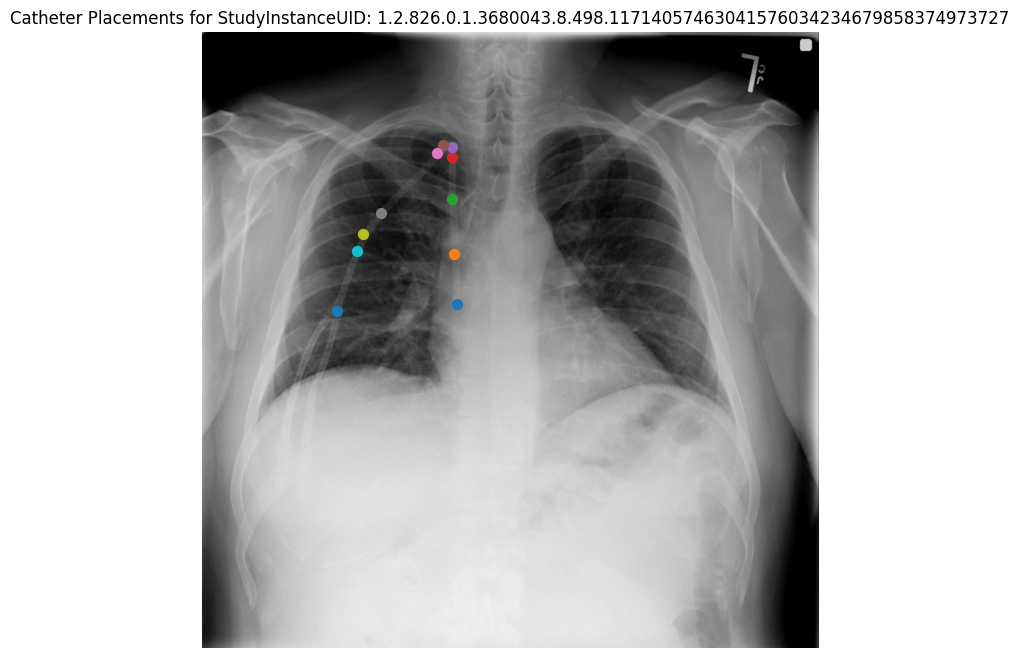

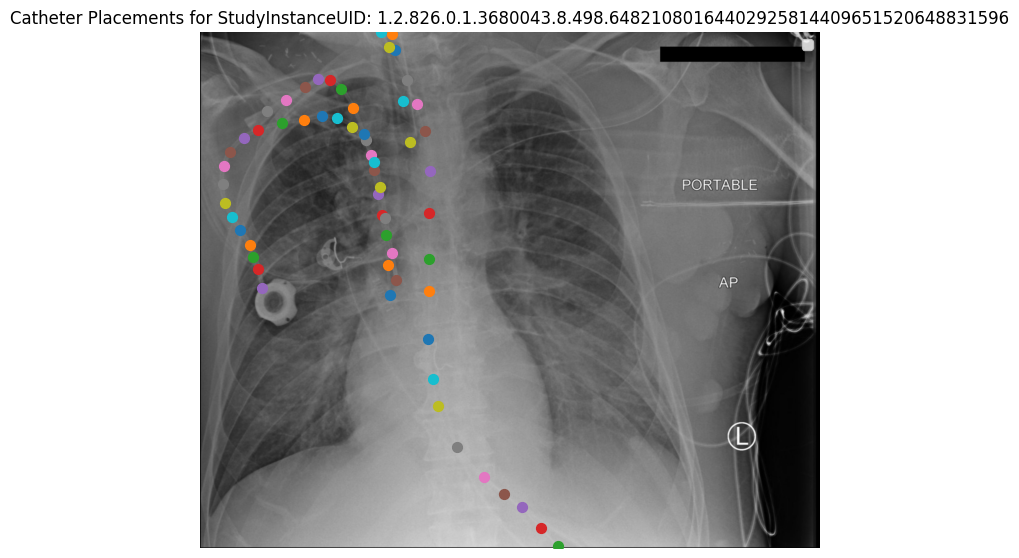

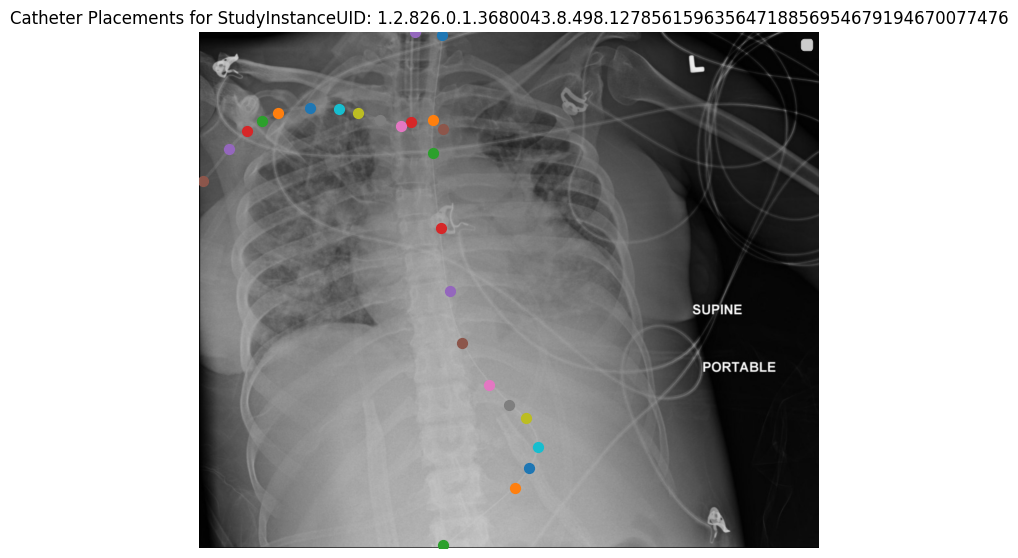

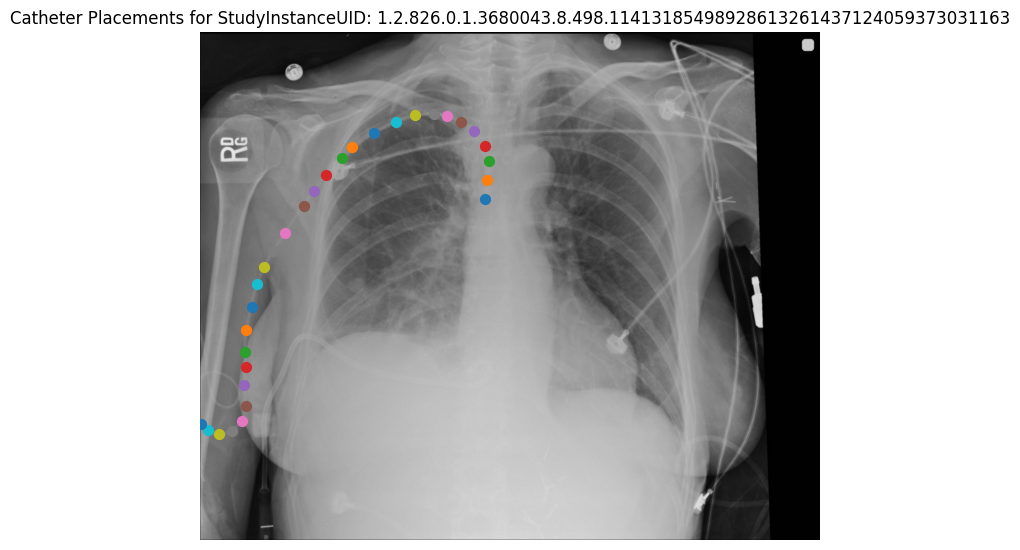

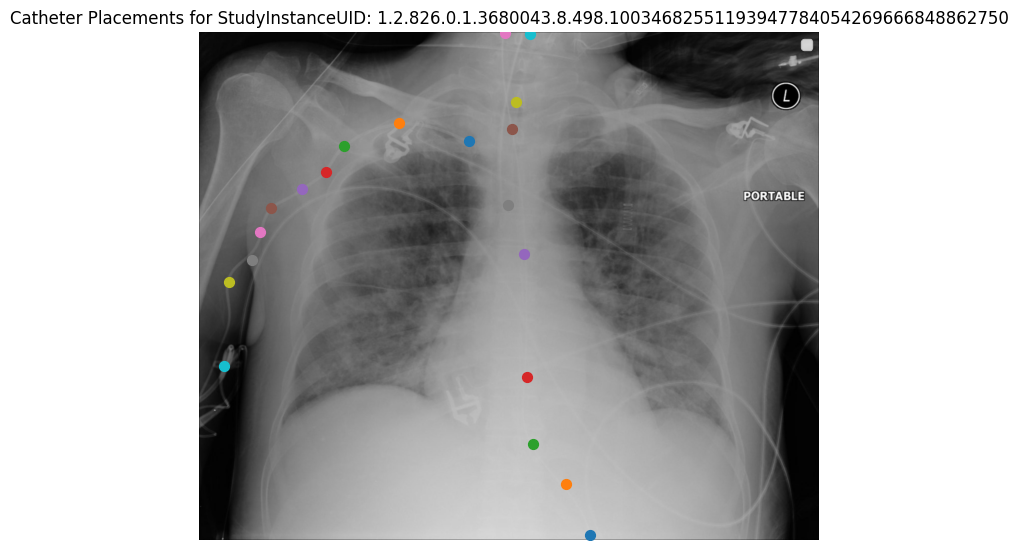

In [ ]:
# Select 5 random StudyInstanceUIDs from the filtered DataFrame
random_studies = cvc_filt_2['StudyInstanceUID'].sample(n=5, random_state=42)

# Plot the randomly selected 3 studies
for study_uid in random_studies:
    plot_catheter_on_image(study_uid, cvc_filt_2)

In [ ]:
df = study_annotated.copy()
# Define a function to classify images as CVC or non-CVC
def classify_cvc(row):
    if row['CVC - Abnormal'] == 1 or row['CVC - Borderline'] == 1 or row['CVC - Normal'] == 1:
        return 'CVC'  # Label as 'CVC'
    else:
        return 'non-CVC'  # Label as 'non-CVC'

# Apply the function to create a new binary label column
df['CVC_binary'] = df.apply(classify_cvc, axis=1)
df.head(1)

StudyInstanceUID  ETT - Abnormal  \
0  1.2.826.0.1.3680043.8.498.23819260719748494858...               0   

   ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                 0             0               0                 0   

   NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  CVC - Borderline  \
0                          0             0               0                 1   

   CVC - Normal  Swan Ganz Catheter Present  PatientID             label  \
0             0                           0  3fc1c97e5  CVC - Borderline   

                                                data CVC_binary  
0  [[950, 1272], [980, 1174], [1011, 1070], [1058...        CVC

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ETT - Abnormal']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ETT - Abnormal'}, axis=1)
              .sort_values('ETT - Abnormal', ascending=True))
  xs = counted['ETT - Abnormal']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('ETT - Abnormal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ETT - Abnormal')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ETT - Borderline']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ETT - Borderline'}, axis=1)
              .sort_values('ETT - Borderline', ascending=True))
  xs = counted['ETT - Borderline']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('ETT - Borderline', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ETT - Borderline')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ETT - Normal']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ETT - Normal'}, axis=1)
              .sort_values('ETT - Normal', ascending=True))
  xs = counted['ETT - Normal']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('ETT - Normal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ETT - Normal')
_ = plt.ylabel('count()')


**Actual modelling**
---



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_dir = "/content/drive/MyDrive/ranzcr-clip-catheter-line-classification/train/"
df['filename'] = img_dir + df['StudyInstanceUID'].astype(str) + ".jpg"

In [ ]:
sample_df = df.sample(frac=0.05, random_state=42)
# change all below to sample_df, remember to change back later pls

In [ ]:
# Data preprocessing and augmentation
img_size = (224, 224)
batch_size = 32
validation_split = 0.2  # 20% of the data will be used for validation

# Create a data generator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split  # Set validation split
)

In [ ]:
# Training generator (80% of the data)
train_generator = datagen.flow_from_dataframe(
    dataframe=sample_df,
    x_col='filename',         # Column with image file paths
    y_col='CVC_binary',       # Use the new binary label column
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',      # Binary classification
    subset='training',
    shuffle=True
)

Found 720 validated image filenames belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_dataframe(
    dataframe=sample_df,
    x_col='filename',         # Column with image file paths
    y_col='CVC_binary',       # Use the new binary label column
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation', # Use validation subset
    shuffle = True
)

Found 180 validated image filenames belonging to 2 classes.


In [ ]:
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)  # Binary classification, change to softmax if multi-class
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# load and build resnet model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=img_size + (3,))
resnet_model = build_model(resnet_base)

In [ ]:
# train resnet model
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 772s 27s/step - accuracy: 0.8578 - loss: 0.6011 - val_accuracy: 0.9611 - val_loss: 18232018.0000
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 563s 24s/step - accuracy: 0.9757 - loss: 0.2597 - val_accuracy: 0.9611 - val_loss: 311134880.0000
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 560s 24s/step - accuracy: 0.9926 - loss: 0.0616 - val_accuracy: 0.9611 - val_loss: 1930240.8750
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 563s 24s/step - accuracy: 0.9892 - loss: 0.0898 - val_accuracy: 0.9611 - val_loss: 665.1339
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 622s 24s/step - accuracy: 0.9863 - loss: 0.1035 - val_accuracy: 0.9611 - val_loss: 0.5218
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 552s 24s/step - accuracy: 0.9808 - loss: 0.1166 - val_accuracy: 0.9611 - val_loss: 0.5042
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 558s 24s/step - accuracy: 0.9866 - loss: 0.0827 - val_accuracy: 0.9611 - val_loss: 0.5080
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 560s 24s/step - accuracy: 0.9827 - loss: 0.0801 - val_

In [ ]:
study_annotated.head(2)

StudyInstanceUID  ETT - Abnormal  \
0  1.2.826.0.1.3680043.8.498.23819260719748494858...               0   
1  1.2.826.0.1.3680043.8.498.23133310896792275593...               0   

   ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                 0             0               0                 0   
1                 0             0               0                 0   

   NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  CVC - Borderline  \
0                          0             0               0                 1   
1                          0             0               0                 1   

   CVC - Normal  Swan Ganz Catheter Present  PatientID             label  \
0             0                           0  3fc1c97e5  CVC - Borderline   
1             1                           0  f6147af3f      CVC - Normal   

                                                data  
0  [[950, 1272], [980, 1174], [1011, 1070], [1058...  
1  [[914, 758], [957, 615], [1047, 543], [1145, 4...